In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## Import Data

In [4]:
DJIA = pd.read_csv('^DJI.csv', header=0) #visual check done, no na/blank values
djia = DJIA.values

DJIA_Comp = pd.read_csv('DJIA_components.csv', header=0)

SP500 = pd.read_csv('^GSPC.csv')
sp500 = SP500.values

dates = djia[:,0]
dates_val = pd.to_datetime(dates)
djia_close = djia[:,4]
sp500_close = sp500[:,4]
T = np.column_stack([dates, djia_close, sp500_close]) #!change to dates_val as needed

## Task 3 Question 01

In [12]:
djia_comp_values = DJIA_Comp.values[:,2]
djia_index_calc = sum(djia_comp_values) / 0.14748071991788 #Per Bloomberg
djia_index_CIQ = 25379.45

print("\nTask 3 Question 01 out:\n")
print("DJIA index value per our calculations: "+str(round(djia_index_calc,2)))
print("DJIA index value per CIQ: "+str(round(djia_index_CIQ,2)))
print("Percentage difference: "+str(round((djia_index_calc/djia_index_CIQ-1)*100,8))+"%")


Task 3 Question 01 out:

DJIA index value per our calculations: 25379.45
DJIA index value per CIQ: 25379.45
Percentage difference: 1.183e-05%


## Task 3 Question 3


Task 3 Question 03 out:



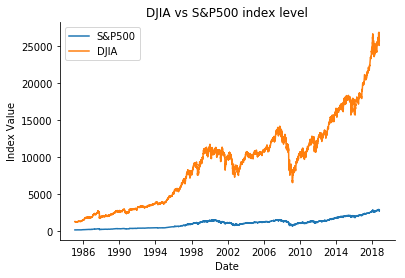

In [17]:
print("\nTask 3 Question 03 out:\n")
plt.plot(dates_val , sp500_close, label = 'S&P500')
plt.plot(dates_val , djia_close, label = 'DJIA')
plt.title('DJIA vs S&P500 index level', loc = 'center')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
ax = plt.gca()
ax.spines['top'].set_color('none') 
ax.spines['right'].set_color('none') 
plt.show()

## Task 3 Question 04

In [18]:
f1_djia = lambda i: -math.log(djia_close[i-1]/djia_close[i])
f1_sp500 = lambda i: -math.log(sp500_close[i-1]/sp500_close[i])
dates_log_ret = dates[1:]
dates_log_ret_val = pd.to_datetime(dates_log_ret)
djia_log_ret = [f1_djia(i) for i in range(1,len(djia_close))]
sp500_log_ret = [f1_sp500(i) for i in range(1,len(sp500_close))]
T_log_ret = np.column_stack([dates_log_ret, djia_log_ret ,sp500_log_ret]) #change to dates_val as needed

print("\nTask 3 Question 04 out:\n")
print("<<<Data generated, no output>>>")


Task 3 Question 04 out:

<<<Data generated, no output>>>


## Task 3 Question 05


Task 3 Question 05 out:

DJIA



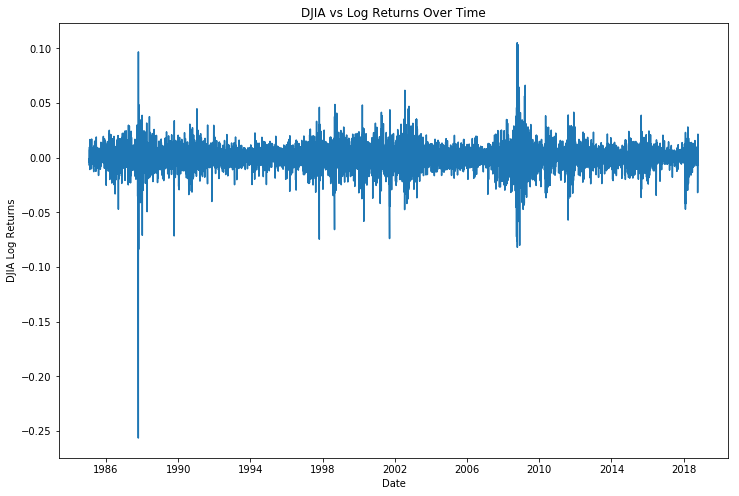

SP500



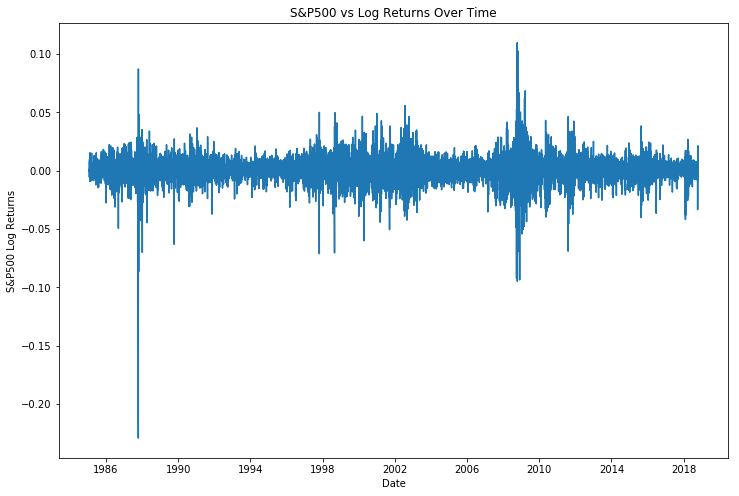

DJIA Histogram



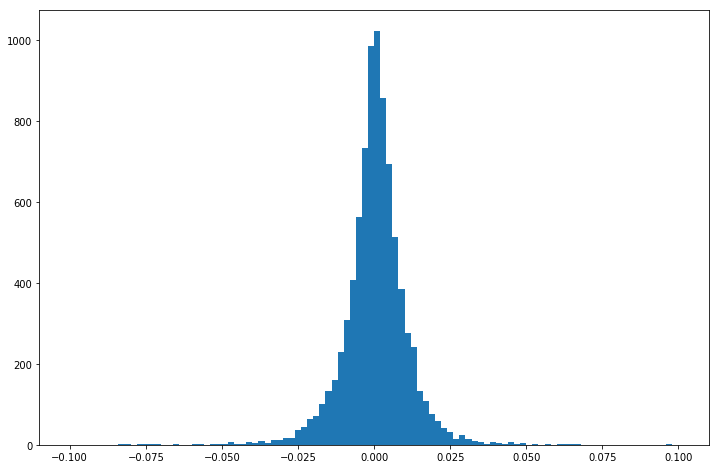

SP500



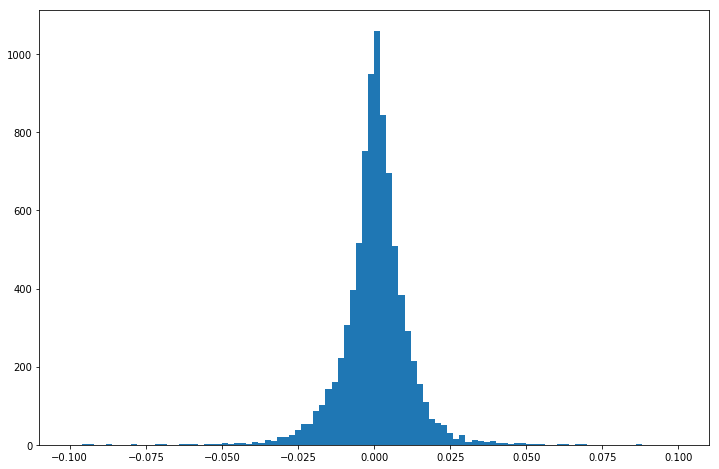

In [32]:
print("\nTask 3 Question 05 out:\n") 

print("DJIA\n")
plt.figure(figsize=(12, 8))
plt.plot(dates_log_ret_val, djia_log_ret)
plt.title('DJIA vs Log Returns Over Time', loc = 'center')
plt.xlabel('Date')
plt.ylabel('DJIA Log Returns')
plt.show()

print("SP500\n")
plt.figure(figsize=(12, 8))
plt.plot(dates_log_ret_val, sp500_log_ret)
plt.title('S&P500 vs Log Returns Over Time', loc = 'center')
plt.xlabel('Date')
plt.ylabel('S&P500 Log Returns')
plt.show()

print("DJIA Histogram\n")
plt.figure(figsize=(12, 8))
plt.hist(djia_log_ret, range=(-0.1,0.1), bins=100, label="Histogram of DJIA log returns")
plt.show()

print("SP500\n")
plt.figure(figsize=(12, 8))
plt.hist(sp500_log_ret, range=(-0.1,0.1), bins=100, label="Histogram of S&P500 log returns")
plt.show()

## Task 3 Question 06

In [33]:
djia_log_ret_mean = np.mean(djia_log_ret)
sp500_log_ret_mean = np.mean(sp500_log_ret)
djia_log_ret_s_var = np.var(djia_log_ret, ddof=1) #numpy ddof means "N-ddof"
sp500_log_ret_s_var = np.var(sp500_log_ret, ddof=1)

print("\nTask 3 Question 06 out:\n")
print("DJIA mean log return: "+str(round(djia_log_ret_mean,6)))
print("SP500 mean log return: "+str(round(sp500_log_ret_mean,6)))
print("DJIA log return sample variance: "+str(round(djia_log_ret_s_var,10)))
print("SP500 log return sample variance: "+str(round(sp500_log_ret_s_var,10)))


Task 3 Question 06 out:

DJIA mean log return: 0.000352
SP500 mean log return: 0.000324
DJIA log return sample variance: 0.0001208244
SP500 log return sample variance: 0.0001265373


## Task 3 Question 07

In [34]:
djia_log_ret_mean_ann = 252*djia_log_ret_mean
sp500_log_ret_mean_ann = 252*sp500_log_ret_mean

djia_log_ret_s_var_ann = 252*djia_log_ret_s_var
djia_log_ret_ann_vol = math.sqrt(djia_log_ret_s_var_ann)

sp500_log_ret_s_var_ann = 252*sp500_log_ret_s_var
sp500_log_ret_ann_vol = math.sqrt(sp500_log_ret_s_var_ann)

print("\nTask 3 Question 07 out:\n")
print("DJIA annualized log return: "+str(round(djia_log_ret_mean_ann,6)))
print("SP500 annualized log return: "+str(round(sp500_log_ret_mean_ann,6)))
print("DJIA log return annualized volitility: "+str(round(djia_log_ret_ann_vol,10)))
print("SP500 log return annualized volitility: "+str(round(sp500_log_ret_ann_vol,10)))


Task 3 Question 07 out:

DJIA annualized log return: 0.088647
SP500 annualized log return: 0.081597
DJIA log return annualized volitility: 0.1744928396
SP500 log return annualized volitility: 0.1785704428


## Task 3 Question 08

In [35]:
djia_log_ret_cons_var = np.var(djia_log_ret, ddof=0) #numpy ddof means "N-ddof"
sp500_log_ret_cons_var = np.var(sp500_log_ret, ddof=0)

f2_gamma = lambda x,y: (x-y**2)**3
f2_kappa = lambda x,y: (x-y**2)**4
djia_gamma = sum([f2_gamma(i, djia_log_ret_mean) for i in djia_log_ret])/(len(djia_log_ret)*(djia_log_ret_cons_var**1.5)) 
djia_kappa = sum([f2_kappa(i, djia_log_ret_mean) for i in djia_log_ret])/(len(djia_log_ret)*(djia_log_ret_cons_var**2)) 
sp500_gamma = sum([f2_gamma(i, sp500_log_ret_mean) for i in sp500_log_ret])/(len(sp500_log_ret)*(sp500_log_ret_cons_var**1.5)) 
sp500_kappa = sum([f2_kappa(i, sp500_log_ret_mean) for i in sp500_log_ret])/(len(sp500_log_ret)*(sp500_log_ret_cons_var**2)) 

print("\nTask 3 Question 08 out:\n") #!#!can someone check this in excel?
print("DJIA skewdness (gamma cap): "+str(round(djia_gamma,6)))
print("DJIA kurtosis (kappa cap): "+str(round(djia_kappa,6)))
print("SP500skewdness (gamma cap): "+str(round(sp500_gamma,6)))
print("SP500 kurtosis (kappa cap): "+str(round(sp500_kappa,6)))


Task 3 Question 08 out:

DJIA skewdness (gamma cap): -1.59555
DJIA kurtosis (kappa cap): 45.184334
SP500skewdness (gamma cap): -1.196884
SP500 kurtosis (kappa cap): 31.300903


## Task 3 Question 09

In [36]:
crit_val = stats.chi2.isf(0.05, df=2)
djia_test_val = ("DJIA", len(djia_log_ret)*((djia_gamma**2/6)+(((djia_kappa-3)**2)/24)))
sp500_test_val = ("SP500", len(sp500_log_ret)*((sp500_gamma**2/6)+(((sp500_kappa-3)**2)/24)))

print("\nTask 3 Question 09 out:\n")
for (i,j) in [djia_test_val, sp500_test_val]:
    print(i+" test statistic : "+str(round(j,4))+". critical value: "+str(round(crit_val,4)))
    if j>crit_val:
        print(i+" test value exceeds critical value. \
              \n - Reject null hypothesis, JB not equal to 0.\
              \n - Data does not fit a normal distribution at 95% confidence")
    if j<crit_val:
        print(i+" test value does not exceed critical valu. \
              \n - Do not reject null hypothesis, JB equal to 0.\
              \n - Data does fits a normal distribution at 95% confidence")
    print("\n")


Task 3 Question 09 out:

DJIA test statistic : 633852.4876. critical value: 5.9915
DJIA test value exceeds critical value.               
 - Reject null hypothesis, JB not equal to 0.              
 - Data does not fit a normal distribution at 95% confidence


SP500 test statistic : 285696.0609. critical value: 5.9915
SP500 test value exceeds critical value.               
 - Reject null hypothesis, JB not equal to 0.              
 - Data does not fit a normal distribution at 95% confidence




## Task 4 Question 01

In [37]:
cov = np.cov(T_log_ret[:,1:].T.astype(float))
#aft slicing dtype=object (cos index is date str). convert to float for .cov()
#note that np reads observations as columns (opposite of matlab)
#[0][0] = var DJIA , [1][1] = var SP500
corr = (cov[0][1])/(math.sqrt(cov[0][0])*math.sqrt(cov[1][1]))

print("\nTask 4 Question 01 out:\n")
print("Correlation between log returns of DJIA and SP500 is: "+str(round(corr,6)))


Task 4 Question 01 out:

Correlation between log returns of DJIA and SP500 is: 0.965149


## Task 4 Question 02

In [38]:
T_djia = len(djia_log_ret) #DJIA is asset 1, SP500 is asset 2
T_sp500 = len(sp500_log_ret)

test_val_2 = (djia_log_ret_mean - sp500_log_ret_mean)/ \
    math.sqrt((djia_log_ret_s_var / T_djia) + (sp500_log_ret_s_var / T_sp500))
test_val_2_abs = abs(test_val_2)
v= ((djia_log_ret_s_var / T_djia) + (sp500_log_ret_s_var / T_sp500))**2 / \
    (((djia_log_ret_s_var / T_djia)**2 / (T_djia - 1)) + \
     ((sp500_log_ret_s_var / T_sp500)**2 / (T_sp500 - 1)))

crit_val_2_R = stats.t.isf(0.025, df=v)
crit_val_2_L = stats.t.isf(1-0.025, df=v)

print("\nTask 4 Question 02 out:\n")
print("Test statistic: "+str(round(test_val_2,6))+" \
    \nCritical Value (L) is: "+str(round(crit_val_2_L,6))+" \
    \nCritical Value (R) is: "+str(round(crit_val_2_R,6))+" \
    \nDegrees of Ffreedom is: "+str(round(v,4)))

print("\n")
if test_val_2_abs > crit_val_2_R:
    print("Test statistic (abs) above critical value. DJIA mean log return != SP500 mean log return.\n")
    if test_val_2 > crit_val_2_R:
        print("Test statistic above critical value. DJIA mean log return > SP500 mean log return.")
    elif test_val_2 < crit_val_2_L:
        print("Test statistic below critical value. DJIA mean log return < SP500 mean log return.")
elif test_val_2_abs <= crit_val_2_R:
    print("Test statistic (abs) below critical value. DJIA mean log return = SP500 mean log return.\n")


Task 4 Question 02 out:

Test statistic: 0.164005     
Critical Value (L) is: -1.960104     
Critical Value (R) is: 1.960104     
Degrees of Ffreedom is: 16988.9382


Test statistic (abs) below critical value. DJIA mean log return = SP500 mean log return.



## Task 4 Question 03

In [39]:
N_djia = len(djia_log_ret) - 1 #same df, order doesn't matter
N_sp500 = len(sp500_log_ret) - 1

test_val_3_F = djia_log_ret_s_var / sp500_log_ret_s_var

crit_val_3_R = stats.f.isf(0.15/2, N_djia, N_sp500)
crit_val_3_L = stats.f.isf(1-0.15/2, N_djia, N_sp500)


print("\nTask 4 Question 03 out:\n")
print("Test statistic: "+str(round(test_val_3_F,6))+" \
    \nCritical Value (R) is: "+str(round(crit_val_3_R,6))+" \
    \nCritical Value (L) is: "+str(round(crit_val_3_L,6))+" \
    \nDegrees of freedom are: "+str(round(N_djia,4))+" (DJIA), and "+str(round(N_sp500,4))+" (SP500)")

print("\n")
if crit_val_3_L < test_val_3_F < crit_val_3_R:
    print("Test statistic not beyond critical values. DJIA log return sample variance = SP500 log return sample variance.")
else:
    print("Test statistic beyond critical values. DJIA log return sample variance != SP500 log return sample variance.")


Task 4 Question 03 out:

Test statistic: 0.954852     
Critical Value (R) is: 1.031724     
Critical Value (L) is: 0.969251     
Degrees of freedom are: 8499 (DJIA), and 8499 (SP500)


Test statistic beyond critical values. DJIA log return sample variance != SP500 log return sample variance.
